# Barnyard Animal Image Classification With Fine-Tuned MobileNet

In [1]:
# This solution code was modified from information obtained in a tutorial presented by Mandy @ DeepLizard 

https://youtu.be/qFJeN9V1ZsI

In [2]:
# Import dependencies
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
from IPython.display import Image
import itertools
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# Set model to parameters of MobileNet architecture (first time requires download from web)
mobilenet_model = tf.keras.applications.mobilenet.MobileNet()

In [4]:
# Display architectue and trainable/non-trainalble parameter quantities of downloaded model
mobilenet_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [5]:
# Desigante variables for image file folder paths
train_path = 'C:/Users/warnj/Desktop/C964 Project Data/Barnyard Images/train'
valid_path = 'C:/Users/warnj/Desktop/C964 Project Data/Barnyard Images/valid'
test_path = 'C:/Users/warnj/Desktop/C964 Project Data/Barnyard Images/test'

In [6]:
# Pass images through MobileNet specific preprocessing function and place in batches, leaving test_batches unshuffled to preserve label mapping
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), batch_size= 30)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), batch_size= 30)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), batch_size= 30, shuffle=False)

Found 4800 images belonging to 8 classes.
Found 1200 images belonging to 8 classes.
Found 400 images belonging to 8 classes.


In [7]:
# Copy architecture of the MobileNet model less the fianl layer
x = mobilenet_model.layers[-1].output
# Replace the final layer with one that only has 8 neurons corresponding to our 8 predictable classes
output = Dense(units=8, activation='softmax')(x)

In [8]:
# Name the modified model
model = Model(inputs=mobilenet_model.input, outputs=output)

In [9]:
# Take advantage of transfer learning by freezing all but the final 18 layers of our new model as non-trainable
for layer in model.layers[:-18]:
    layer.trainable = False

In [10]:
# Display architectue and trainable/non-trainalble parameter quantities of the modified model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [11]:
# Assign variables for use in display of images and labels
imgs, labels = next(train_batches)

In [12]:
# Function used for displaying images
def plotImages(images_arr):
    fig, axes = plt.subplots(3, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

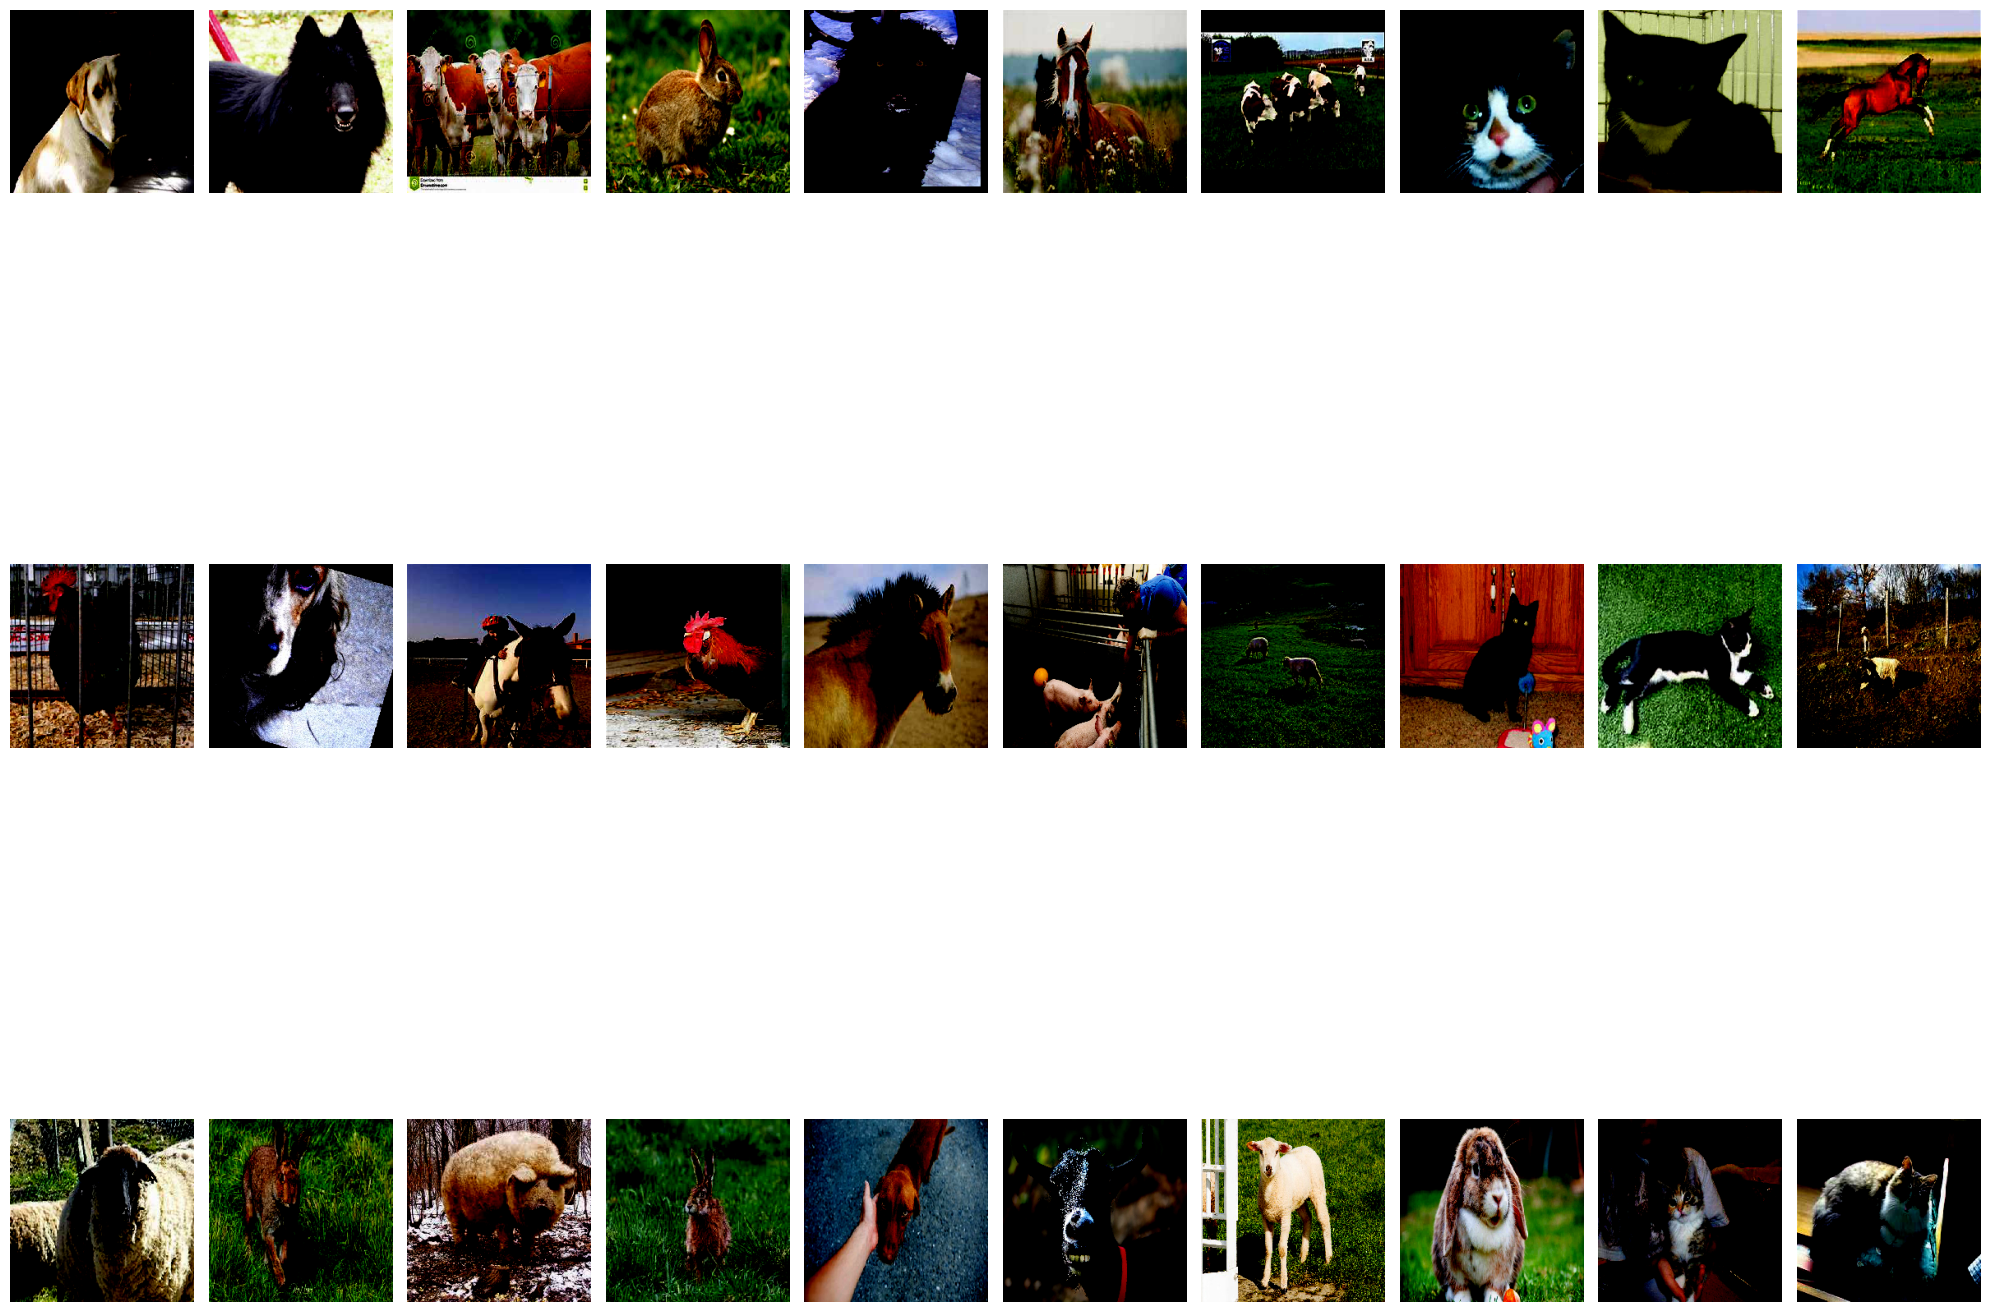

[[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]]


In [13]:
# Display a batch of preprocessed images followed by their corresponding one-hot encodings
# 0=Cat, 1=Chicken, 2=Cow, 3=Dog, 4=GoatOrSheep, 5=Horse, 6=Pig, 7=Rabbit
plotImages(imgs)
print(labels)

In [14]:
# Compile the model for training
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Train model and save in variable for easy plotting access
for_plotting = model.fit(x=train_batches, validation_data=valid_batches, epochs=15, verbose=2)

Epoch 1/15
160/160 - 252s - loss: 2.0378 - accuracy: 0.6333 - val_loss: 2.0176 - val_accuracy: 0.8133 - 252s/epoch - 2s/step
Epoch 2/15
160/160 - 250s - loss: 1.9936 - accuracy: 0.9004 - val_loss: 1.9806 - val_accuracy: 0.8908 - 250s/epoch - 2s/step
Epoch 3/15
160/160 - 250s - loss: 1.9594 - accuracy: 0.9460 - val_loss: 1.9597 - val_accuracy: 0.8558 - 250s/epoch - 2s/step
Epoch 4/15
160/160 - 249s - loss: 1.9294 - accuracy: 0.9596 - val_loss: 1.9290 - val_accuracy: 0.9083 - 249s/epoch - 2s/step
Epoch 5/15
160/160 - 250s - loss: 1.9004 - accuracy: 0.9735 - val_loss: 1.8995 - val_accuracy: 0.9200 - 250s/epoch - 2s/step
Epoch 6/15
160/160 - 253s - loss: 1.8722 - accuracy: 0.9835 - val_loss: 1.8748 - val_accuracy: 0.9383 - 253s/epoch - 2s/step
Epoch 7/15
160/160 - 250s - loss: 1.8459 - accuracy: 0.9867 - val_loss: 1.8503 - val_accuracy: 0.9325 - 250s/epoch - 2s/step
Epoch 8/15
160/160 - 252s - loss: 1.8200 - accuracy: 0.9883 - val_loss: 1.8289 - val_accuracy: 0.9258 - 252s/epoch - 2s/step


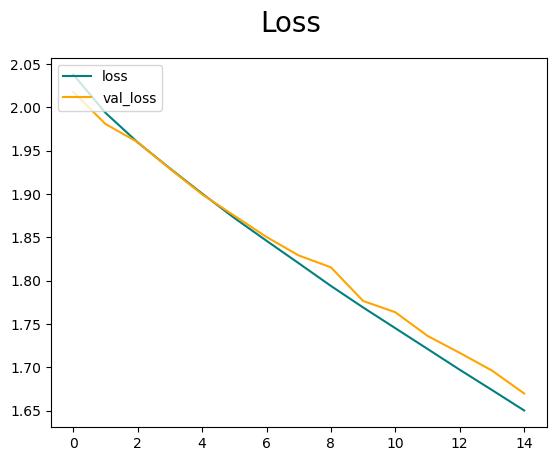

In [16]:
# Plot loss vs. validation loss
fig = plt.figure()
plt.plot(for_plotting.history['loss'], color='teal', label='loss')
plt.plot(for_plotting.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

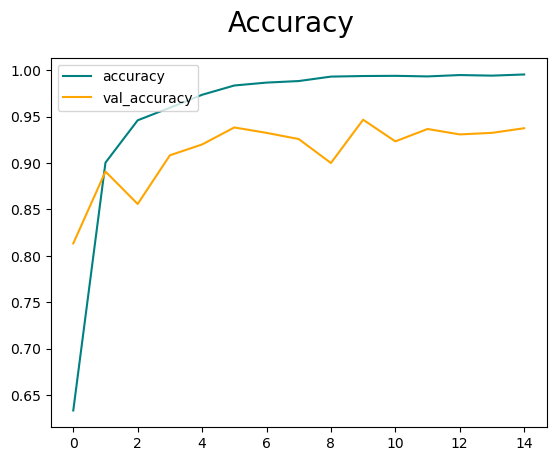

In [17]:
# Plot accuracy vs. validation accuracy
fig = plt.figure()
plt.plot(for_plotting.history['accuracy'], color='teal', label='accuracy')
plt.plot(for_plotting.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [18]:
# Run test data through the trained model for predictions 
predictions = model.predict(x=test_batches, verbose=0)

In [19]:
# The confusion matrix will compare true labels to predicted class for each image
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions,axis=-1))

In [20]:
# Confusion Matrix plotting function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix without normalization')
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')

In [21]:
# Verify labeling order of the test classes for use in the confusion matrix visualization
test_batches.class_indices

{'cat': 0,
 'chicken': 1,
 'cow': 2,
 'dog': 3,
 'goatorsheep': 4,
 'horse': 5,
 'pig': 6,
 'rabbit': 7}

Confusion matrix without normalization


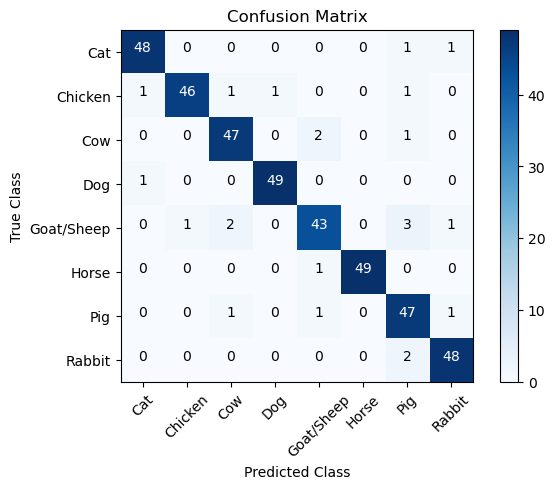

In [22]:
# Plot the confusion matrix with appropriate labels and data
cmlabels = ['Cat', 'Chicken', 'Cow', 'Dog', 'Goat/Sheep', 'Horse', 'Pig', 'Rabbit']
plot_confusion_matrix(cm=cm, classes=cmlabels, title='Confusion Matrix')

In [23]:
# Checks to make sure the file doesn't already exist.
if os.path.isfile('Models/BarnyardAnimalFeedMobileNetFineTuned8Class.h5') is False:
# If not, saves a trained model, including architecture, parameters, weights, and all.
    model.save('Models/BarnyardAnimalFeedMobileNetFineTuned8Class.h5')

In [24]:
# Function to preprocess a single image to MobileNet specifications
def prepare_image(file):
    img_path = 'C:/Users/warnj/Desktop/C964 Project Data/Barnyard Images/verification/'
    img = image.load_img(img_path + file, target_size = (224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

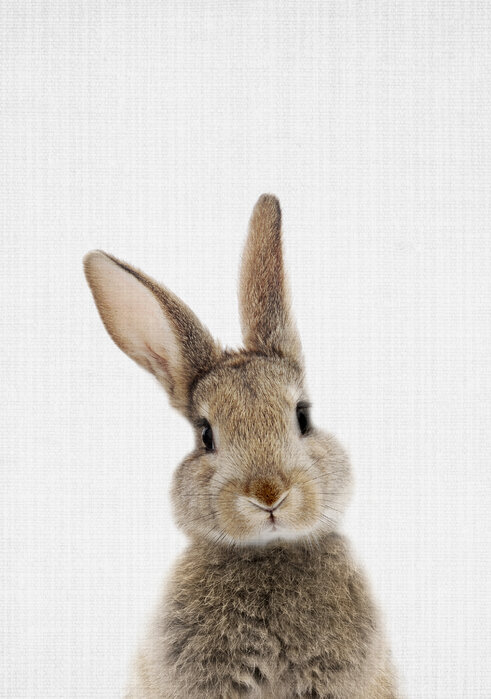

In [39]:
# Displays a single image file
Image(filename='C:/Users/warnj/Desktop/C964 Project Data/Barnyard Images/verification/Rabbit 064.jpg', width=300, height=300)

In [38]:
# makes a prediction on a single image passed to the model
preprocessed_image =prepare_image('Rabbit 064.jpg')
prediction = model.predict(preprocessed_image)
if np.argmax(prediction) == 0:
    print('This looks like a cat to me.')
elif np.argmax(prediction) == 1:
    print('This looks like a chicken to me.')
elif np.argmax(prediction) == 2:
    print('This looks like a cow to me.')
elif np.argmax(prediction) == 3:
    print('This looks like a dog to me.')
elif np.argmax(prediction) == 4:
    print('This looks like a goat or sheep to me.')
elif np.argmax(prediction) == 5:
    print('This looks like a horse to me.')
elif np.argmax(prediction) == 6:
    print('This looks like a pig to me.')
elif np.argmax(prediction) == 7:
    print('This looks like a rabbit to me.')

1/1 [==============================] - 0s 61ms/step
This looks like a rabbit to me.
